# Bank Marketing

This project demonstrated the application of machine learning techniques to predict customer behavior in a bank's marketing campaign. 

While the current model performs well for the majority class, there is room for improvement, especially with regard to predicting the minority class. Further optimization and experimentation with other algorithms will help improve overall performance.

In [1]:
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

In [2]:
# Define file paths
zip_file_path = 'Bank Marketing Dataset.zip'  
extracted_folder = 'Bank_Marketing_Data' 

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)  # Extract to the folder

# Check the contents of the extracted folder
extracted_files = os.listdir(extracted_folder)
print(f"Files in extracted folder: {extracted_files}")

Files in extracted folder: ['bank-full.csv', 'bank-names.txt', 'bank.csv', 'case study.ipynb']


In [3]:
# Load the dataset (use 'bank-full.csv' or 'bank.csv')
csv_file_name = os.path.join(extracted_folder, 'bank-full.csv')  # Adjust to the correct file
df = pd.read_csv(csv_file_name)

# Inspect the first few rows to verify the data
print(df.head())
print(df.columns)

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 

In [7]:
# Data Preprocessing
# Split the dataset (before one-hot encoding) and apply SMOTE
X = df.drop(columns=['y'])
y = df['y']

# Apply one-hot encoding for categorical features
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Handle class imbalance using SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Standardize the features
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train_smote)
X_test = scaler.transform(X_test)

In [8]:
# Train Logistic Regression with balanced class weights
model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          no       0.93      0.94      0.93     11966
         yes       0.50      0.45      0.48      1598

    accuracy                           0.88     13564
   macro avg       0.71      0.70      0.70     13564
weighted avg       0.88      0.88      0.88     13564



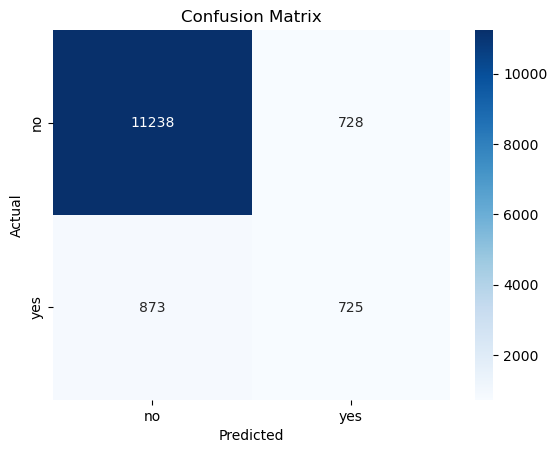

In [9]:
# Plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Although the accuracy is high, the model is biased towards predicting the 'no' class due to the imbalance in the target variable. 
# Further steps can be taken to address this, such as tuning the model, trying different sampling methods, or using algorithms that
# handle class imbalance better.

In [ ]:
# Next Steps

# Hyperparameter Tuning: Try tuning the hyperparameters of the model to improve performance, especially for the minority class.
# Model Improvement: Experiment with other models like Random Forest, XGBoost, or Neural Networks.
# Feature Engineering: Investigate additional feature engineering techniques to improve model performance, such as interaction terms or domain-specific transformations.